Text(0.5, 1.0, 'Original Signal')

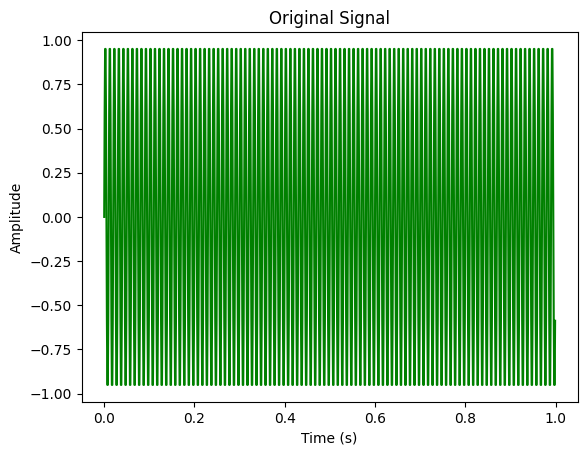

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
Fs = 1000  # Sampling frequency (Hz)
Ts = 1/Fs  # Sampling period (s)
T = 1     # Signal duration (s)
N = int(T/Ts)  # Number of samples

# Generate a sinusoidal signal
f = 100  # Signal frequency (Hz)
t = np.arange(N)*Ts  # Time vector
x = np.sin(2*np.pi*f*t)

# Plot original signal
fig, ax = plt.subplots()
plt.plot(t, x,'g')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

Text(0.5, 1.0, 'Sampling Error vs Frequency')

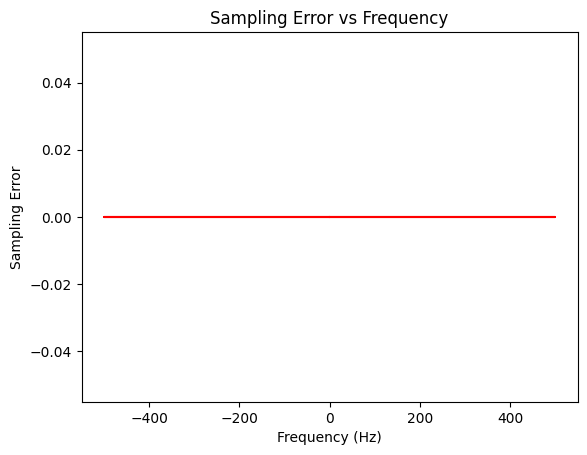

In [16]:
# Sample the signal
n = np.arange(N)
xn = x[n]

# Calculate sampling error vs frequency
f_sample = np.fft.fftfreq(N, Ts)
X = np.fft.fft(x)/N  # Fourier transform of original signal
Xn = np.fft.fft(xn)/N  # Fourier transform of sampled signal
sampling_error = np.abs(X - Xn)

# Plot sampling error vs frequency
fig, ax = plt.subplots()
plt.plot(f_sample, sampling_error,'r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sampling Error')
plt.title('Sampling Error vs Frequency')

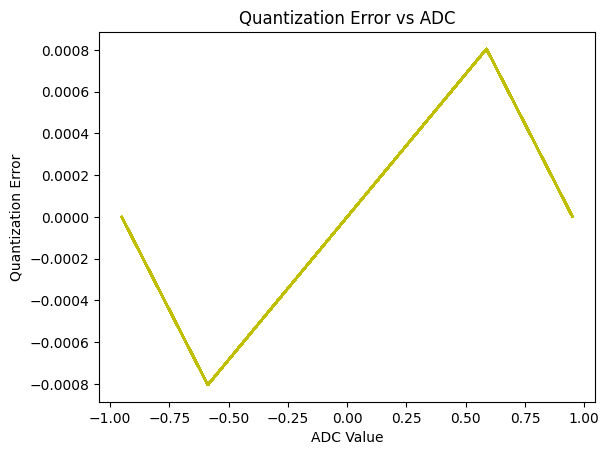

In [17]:
# Quantize the signal
n_bits = 8  # Number of bits for ADC
Vmax = np.max(np.abs(xn))  # Maximum signal amplitude
q_step = Vmax/(2**(n_bits-1))  # Quantization step size
xnq = np.round(xn/q_step)*q_step  # Quantized signal

# Calculate quantization error vs ADC
quantization_error = xn - xnq

# Plot quantization error vs ADC
fig, ax = plt.subplots()
plt.plot(xn, quantization_error,'y')
plt.xlabel('ADC Value')
plt.ylabel('Quantization Error')
plt.title('Quantization Error vs ADC')

plt.show()